# Monte Carlo Methods for Estimation

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. 

First we will see how Monte Carlo Methods are used for estimation and for this we will be taking the most common example of the estimation of value of **Pi** .  

To estimate the value of **Pi** we will be taking a circle drawn inside a square and we will randomly try throwing darts , in the form of random numbers and we will approximate that the number lies inside the circle or not. So, this way we will get the number of points which lie inside circle and the ones which do not. 

So,  
Approximation of value of pi :  $\frac{Area of circle}{Area of square}$ 

$$=\frac{\pi r^2}{4 * r^2}$$ 

$$=\frac{\pi}{4}$$  

Approximate of value of pi = $4 * \frac{Area of circle}{Area of square}$

The approximate value of Pi : 3.1268
The actual value of Pi : 3.141592653589793


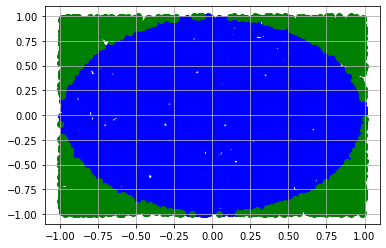

In [1]:
%matplotlib inline
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

# darts
N = 10000

# lists which will take the x and y values of random variables and which lie inside circle  
circlex = []
circley = []  

# lists which will take the x and y values of random variables and which lie inside square  
squarex = []
squarey = []  

i=0
while i<= N:
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    if(x**2+y**2<=1):
        circlex.append(x)
        circley.append(y)
    else:
        squarex.append(x)
        squarey.append(y)
    i+=1


pi = 4*len(circlex)/float(N)  

print("The approximate value of Pi :",pi)
print("The actual value of Pi :",np.pi)

# Visualising  

plt.grid()
plt.scatter(circlex,circley,color='b')
plt.scatter(squarex,squarey,color='g')


**Standard Deviation** 

As you will remember, the square root of the variance is the standard deviation, which gives a measure of the variation expected in the individual sample.


In [2]:
# Standard Deviation in value of Pi

stnd = len(circlex)*(4-np.pi)**2+len(squarex)*(0-np.pi)**2

stddev = np.sqrt(stnd).round(3)
stddev

165.273

In [3]:
p_pi = len(circlex)/(len(squarex)+len(circlex))
n=len(squarex)+len(circlex)
se_female = np.sqrt(p_pi * (1 - p_pi) / n)
z_score = 1.96
lcb = p_pi - z_score* se_female #lower limit of the CI
ucb = p_pi + z_score* se_female #upper limit of the CI

# Estimation of Error

We will estimate the error which has come in the value of pi estimated using Monte Carlo method

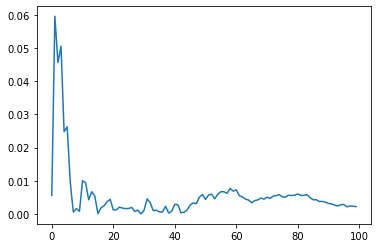

In [4]:
# Estimation of Error
%matplotlib inline
import matplotlib.pyplot as plt

result = []
avg_pi_values = []
def exp(n=10000):
    points= [(random.uniform(-1,1),random.uniform(-1,1))for i in range(1000)]
    points_inside_circle=[(x,y) for x,y in points if x**2+y**2<=1]
    return 4* len(points_inside_circle)/len(points)

for _ in range(100):
    result.append(exp())
    avg_pi = sum(result)/len(result)
    avg_pi_values.append(avg_pi)
    
avg_pi_error = [abs(np.pi-pi) for pi in avg_pi_values]

# Visualising avgerage pi errors
plt.plot(avg_pi_error)


# Confidence Interval 

Confidence intervals are calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence.

**How are Confidence Intervals Calculated?**  

Equation for calculating Confidence Interval is as follows:
 $$ Best Estimate \pm Margin of Error $$
 
 where **Best Estimate** is observed population proportion or mean and **Margin of Error** is the t- multiplier. 
 
The t-multiplier is calculated based on degrees of freedom and desired confidence level . For samples with more than 30 observations and a confidence level of 95% , the t-multiplier is **1.96**.

The equation to create a 95% confidence interval can also be shown as :  

$$ Population Proportion or Mean \pm t-multiplier * Standard Error)  $$

Lastly,the Standard Error is calculated differently for population proportion and mean:

$$Standard Error for Population Proportion = \sqrt\frac{Population Proportion*(1-Population Proportion)}{Number of Observations}$$

$$ Standard Error for Mean = \frac{Standard Deviation}{\sqrt{ Number of Observations}}$$

Now , let's continue the above example and calculate confidence interval for value of $\frac{\pi}{4}$

In [5]:
# Calculating Confidence interval for Pi/4

print("Actual value of pi/4: ",np.pi/4) # Actual value of pi/4

# Printing values of lengths to check
print ("Length of circlex: ",len(circlex),"\nLength of squarex: ",len(squarex),"\nTotal length:", len(circlex)+len(squarex))

# Finding proportion
p_pi = len(circlex)/(len(squarex)+len(circlex))

n=  len(squarex)+len(circlex)

# Standard Error
se_pi = np.sqrt(p_pi * (1 - p_pi) / n)

# Z-score
z_score = 1.96

# Calculating lower and upper limits

lcb = p_pi - z_score* se_pi #lower limit of the CI
ucb = p_pi + z_score* se_pi #upper limit of the CI

print(f"The lower limit is: {lcb}\nThe upper limit is: {ucb}")

Actual value of pi/4:  0.7853981633974483
Length of circlex:  7817 
Length of squarex:  2184 
Total length: 10001
The lower limit is: 0.7735245923794866
The upper limit is: 0.7897190832529503


In [6]:
# We can also use this function to calculate confidence interval 
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_pi, n)

(0.7735247411682716, 0.7897189344641652)

We see that our $\frac{\pi}{4}$ value lies with the found interval .

# Monte Carlo Integration

Monte Carlo methods are numerical techniques which rely on random sampling to approximate their results . Monte Carlo Integration applies this process to numerical estimation of integrals.Monte Carlo integration is a technique for numerical integration using random numbers. It is a particular Monte Carlo method that numerically computes a definite integral.Monte Carlo randomly chooses points at which the integrand is evaluated. This method is particularly useful for higher-dimensional integrals.  

So, in simple words it can be said that Monte Carlo Integration is used for definite integration .

# How is Monte Carlo Integration Done ?

Here we will look at the method of doing Monte Carlo .  

In order to integrate a function over a complicated domain D, Monte Carlo integration picks random points over some simple domain $D^{'}$ which is a superset of D, checks whether each point is within D, and estimates the area of D (volume, n-dimensional content, etc.) as the area of $D^{'}$ multiplied by the fraction of points falling within D.  

Now, we pick up N randomly distributed points $x_{1},x_{2},x_{3},......x_{N},$ in multidimensional volume V to determine the integral of function f in this volume gives a result  

$\int_ f dv \approx V<f>\pm V \sqrt \frac{<f^{2}>-<f>^{2}}{N}$  

where, 

$<f> \equiv \frac{1}{N}\sum_{i=1}^{N}f(x_{i})$

$<f^{2}>\equiv \frac{1}{N}\sum_{i=1}^{N}f^{2}(x_{i})$  

Now , we will look at the implementation of Monte Carlo . We take $\sin x$ as the function for integration from 0 to $\pi$ .

In [7]:
# Monte Carlo Integration 

from scipy import random 
import numpy as np

#Limits of integration 
a = 0
b = np.pi

# No of random variables
N=1000

# Setting up random variable
xrand = random.uniform(a,b,N)

# Implementing the given function of integration
def func(x):
    return np.sin(x)
integral =0.0 

for i in range(N):
    integral += func(xrand[i])

# Final answer of integration
answer = (b-a)/float(N)*integral
print('The integral from o to pi of sin(x):' ,answer)

The integral from o to pi of sin(x): 2.0594217514137396


Text(0.5, 0, 'Areas')

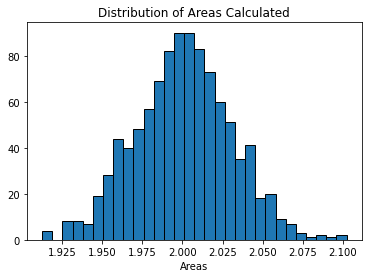

In [8]:
# Visualising the answer using Monte Carlo Integration

from scipy import random 
import numpy as np
import matplotlib.pyplot as plt

#Limits of integration 
a = 0
b = np.pi

# No of random variables
N=1000

areas =[]
for i in range(N):
    
# Setting up random variable
    xrand = random.uniform(a,b,N)

# Implementing the given function of integration
    def func(x):
        return np.sin(x)
    integral =0.0 

    for i in range(N):
        integral += func(xrand[i])

# Final answer of integration
    answer = (b-a)/float(N)*integral
    areas.append(answer)

plt.title('Distribution of Areas Calculated')
plt.hist(areas,bins=30, ec = 'black')
plt.xlabel('Areas')

# Monte Carlo Methods for Hypothesis Testing

Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. The methodology employed by the analyst depends on the nature of the data used and the reason for the analysis.

Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. Such data may come from a larger population, or from a data-generating process. 

**When we wish to evaluate two mutual exclusive statement on a population using sample data and then we finally conclude that this population is true for which particular statement.**
Suppose that we wish to test a hypothesis concerning a parameter $\theta$ that lies in a parameter space $\Theta$. The hypotheses of interest are:

H$_{0} : \theta ∈ \Theta_{0}\ vs \ H_{1} : \theta \in \Theta_{1}$

where $\Theta_{0}$ and $\Theta_{1}$ partition the parameter space $\Theta$.

**Steps for Hypothesis Testing-**  
1. Make initial assumption ($H_{0}$-- this is **Null Hypothesis**)
2. Collect Data - This particular data is evidences.
3. Gather the evidences to reject or accept the Null Hypothesis.  

There is also **Alternate Hypothesis ($H_{1}$)** which is said as opposite of **Null Hypothesis**. Null Hypothesis becomes true if we are able to prove it using the evidences and if we aren't able to prove it then the Alternate Hypothesis becomes true and we will reject Null Hypothesis and accept the Alternate Hypothesis.

**Two types of error can occur in statistical hypothesis testing**

A Type I error occurs if the null hypothesis is rejected when in fact the null hypothesis is true. A Type II error occurs if the null hypothesis is not rejected when in fact the null hypothesis is false.

The probability of making a Type I error when null hypothesis is called level of significance.

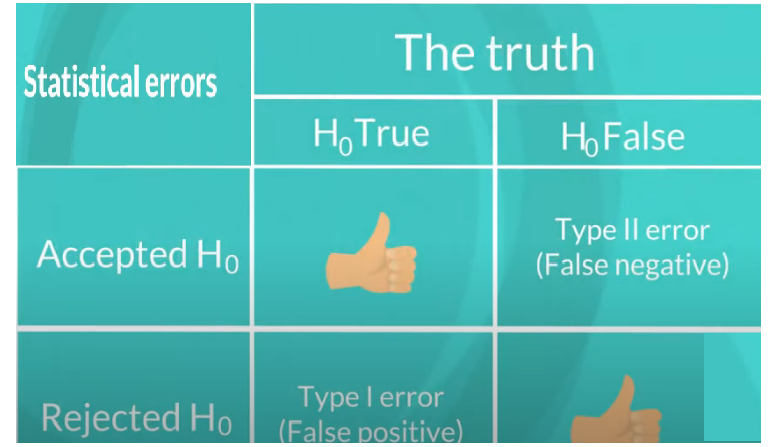

In [9]:
from IPython.display import Image
Image('../images/TypeIandTypeIIError.png',width=500)

Let's take some examples to understand this.   

**Example** We take a sample data of ages and calculate the mean of the age data . Now we take a value near to its mean and try to estimate whether it is the expected value of Null Hypothesis or not.

In [10]:
# Sample Data
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [11]:
import numpy as np
ages_mean = np.mean(ages)
ages_mean

30.34375

In [12]:
# Selecting sample randomly
sample_size = 10
age_sample = np.random.choice(ages,sample_size)
age_sample

array([18, 26, 43, 40, 40, 18, 43, 43, 24, 20])

In [13]:
# Obtaining statistic t-test value and p-value by taking 30 value for estimating Null Hypothesis
from scipy.stats import ttest_1samp
ttest,p_value = ttest_1samp(age_sample,30)
print(p_value)

0.6812681165480632


In [14]:
# Analysing
if p_value < 0.05:
    print("We are accepting Null Hypothesis")
else :
    print("We are rejecting Null Hypothesis")

We are rejecting Null Hypothesis


So, in this example we cannot accept 30 as mean value of our sample data and hence we reject our Null Hypothesis.

**Example** Compare if the Mean of the ages of students in a school is different from that of the mean of ages of students in Class A in the school . Considering Null Hypothesis as there is no difference in the mean age of the two .

In [15]:
# Data
import numpy as np 
import pandas as pd
import scipy.stats as stats
import math

np.random.seed(6)
# considering ages start from 18 and mean age for school is 35 and for Class A is 30
school_ages = stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages = stats.poisson.rvs(loc=18,mu=30,size=60)


In [16]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [17]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [18]:
# Mean of School ages
school_ages_mean = np.mean(school_ages)
school_ages_mean

53.303333333333335

In [19]:
# Mean of Class_A ages
classA_ages_mean = np.mean(classA_ages)
classA_ages_mean 

46.9

In [20]:
# Taking out p-value
_,pvalue = stats.ttest_1samp(classA_ages,school_ages_mean)
pvalue

1.139027071016194e-13

In [22]:
# Checking if the means are same

if pvalue < 0.05:
    print("We are rejecting Null Hypothesis")
else :
    print("We are accepting Null Hypothesis")

We are rejecting Null Hypothesis


Since , our p-value is less than 0.05 and according to our assumption of Null Hypothesis we cannot accept it.

**Using Monte Carlo for Hypothesis Testing** 

Lets take an example for understanding this.

**Example** . Suppose that $X_{1}$, . . . , $X_{20}$ is a random sample from a N($\mu$, $\sigma^2$) distribution. Test $H_{0}$ : $\mu$ = 500 ,$H_{1}$ : $\mu$ > 500 at $\alpha$ = 0.05. Under the null hypothesis, compute an empirical probability of Type I error when $\sigma$ = 100, and check that it is approximately equal to $\alpha = 0.05$.

In [38]:
import numpy as np
from scipy.stats import norm
import scipy.stats as stats 
# No of samples
n = 20
alpha = 0.05
sigma = 100
mu0 = 500

# No of simulations 
m = 10000

# Storing p-values
p =[]

for i in range(m):
    x = norm.rvs(size=n,loc=mu0,scale=sigma)
    _,pvalue = stats.ttest_1samp(x,mu0)
   
    if(pvalue < alpha):
        p.append(pvalue)
    
t = np.mean(p)
s = np.sqrt(t * (1 - t) / m)
print(t,s)

0.024925774510605486 0.0015589894250972948


The observed Type I error rate in this simulation is 0.02506.  Estimates of Type I error probability will vary, but should be close to the nominal rate $\alpha$ = 0.05 because all samples were generated under the null hypothesis from the assumed model for a t-test (normal distribution). In this experiment the empirical Type I error rate differs from $\alpha$ = 0.05 by less than one standard error.  
Theoretically, the probability of rejecting the null hypothesis when $\mu$ = 500
is exactly $\alpha$ = 0.05 in this example. The simulation really only investigates empirically whether the method of computing the p-value in stats.ttest_1samp (a numerical algorithm) is consistent with the theoretical value $\alpha$ = 0.05. 

# Using Monte Carlo simulation for Power Analysis 

In a test of hypotheses $H_{0}$ vs $H_{1}$, a Type II error occurs when  $H_{1}$ is true, but $H_{0}$ is not rejected. The power of a test is given by the power function $\pi$ : $\Sigma → [0, 1]$, which is the probability $\pi (\theta)$ of rejecting $H_{0}$ given that the true value of the parameter is $\theta$. Thus, for a given $\theta_{1} \in  \Sigma_{1}$, the probability of Type II error is 1 − $\pi(\theta_{1}$). Ideally, we would prefer a test with low probability of error. Type I error is controlled by the choice of the significance level $\alpha$. Low Type II error corresponds to high power under the alternative hypothesis.
Thus, when comparing test procedures for the same hypotheses at the same significance level, we are interested in comparing the power of the tests

Let’s look at an example of how we would do it. The initial steps are:

1. Collect sample data of the metric(s) we are influencing in the experiment over a fixed period of time.
2. Inspect the sample data and decide on the statistical test that is appropriate for this data (t-test, Chi-Squared, etc.).

In [48]:
import numpy as np

from scipy.stats import norm, binom
from statsmodels.stats.weightstats import ttest_ind

# Sample data would be actual data measured over a fixed period of time prior to our 
# experiment. For illustration purposes here we have generated data from a normal 
# distribution.
sample_mean = 21.50
sample_sd = 12.91
sample_data = norm.rvs(loc=sample_mean, scale=sample_sd, size=20000)

sample_sizes = range(250, 20000 + 1, 250) # Sample sizes we will test over
alpha = 0.05 # Our fixed alpha
sims = 2000 # The number of simulations we will run per sample size

# The minimum relative effect we will test for (3%). We could try multiple relative
# effect is we are not sure what our minimum relative effect should be
relative_effect = 1.03 
alternative = "two-sided" # Is the alternative one-sided or two-sided 

power_dist = np.empty((len(sample_sizes), 2))
for i in range(0, len(sample_sizes)): 
    N = sample_sizes[i]
    
    control_data = sample_data[0:N]
    # Multiply the control data by the relative effect, this will shift the distribution
    # of the variant left or right depending on the direction of the relative effect
    variant_data = control_data * relative_effect 
    
    significance_results = []
    for j in range(0, sims):
        # Randomly allocate the sample data to the control and variant
        rv = binom.rvs(1, 0.5, size=N) 
        control_sample = control_data[rv == True] 
        variant_sample = variant_data[rv == False]
        
        # Use Welch's t-test, make no assumptions on tests for equal variances
        test_result = ttest_ind(control_sample, variant_sample, 
                                alternative=alternative, usevar='unequal') 
        # Test for significance
        significance_results.append(test_result[1] <= alpha) 
        
    # The power is the number of times we have a significant result 
    # as we are assuming the alternative hypothesis is true
    power_dist[i,] = [N, np.mean(significance_results)] 

This is power analysis using **Monte Carlo**